# How to download flights csv file from transtats website

**In this notebook, we will**
1. Download a csv file for your chosen year(s) and month(s)
2. Prepare the data for further processing
3. Push the prepared data to a table in the database




In [45]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2
import requests #package for getting data from the web
from zipfile import * #package for unzipping zip files
from sql import engine #adjust this as necessary to match your sql.py connection methods
from sqlalchemy import create_engine
from sql import get_data 
from sql import engine


# 1. Download csv file with flight data for your specific year/month

In the following, you are going to download a csv file containing flight data from [this website](https://transtats.bts.gov).    
You can specify, which data you want to download. 

Choose a month/year that you want to explore further.
With the following command lines, you will download a csv file on public flight data from [this website](https://transtats.bts.gov) containing data of your chosen month/year.    
The file will be stored in a data folder.

In [4]:
# Specifies path for saving file
data_path ='data/' 
# Create the data folder
#!mkdir {path}

In [7]:
years = [1992] # list of years you want to look at, specify one year
months = [8] # list of months you want to look at, specify one month


#Loop through months
for year in years:
   for month in months:
      # Get the file from the website https://transtats.bts.gov
        zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'
        csv_file = f'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_{year}_{month}.csv'
        url = (f'https://transtats.bts.gov/PREZIP/{zip_file}')
         #Download the database
        r = requests.get(f'{url}', verify=False)
         #Save database to local file storage
        with open(data_path+zip_file, 'wb') as f:
       ##     f.write(r.content)

SyntaxError: unexpected EOF while parsing (2751987803.py, line 16)

In [ ]:
# Unzip your file
#ith ZipFile(path+zip_file, 'r') as zip_ref:
    #zip_ref.extractall(path)

In [8]:
# Read in your data
#df = pd.read_csv(data/flights_1992.csv', low_memory = False)
#display(df.shape)
#display(df.head())

df = pd.read_csv('data_1992.csv')
display(df.shape)
display(df.head())

(442131, 110)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,1992,3,8,22,6,1992-08-22,UA,19977,UA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992,3,8,23,7,1992-08-23,UA,19977,UA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,3,8,24,1,1992-08-24,UA,19977,UA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992,3,8,25,2,1992-08-25,UA,19977,UA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992,3,8,26,3,1992-08-26,UA,19977,UA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Prepare the csv file for further processing

In the next step, we clean and prepare our dataset.

a) Since the dataset consists of a lot of columns, we we define which ones to keep.

In [9]:
# Columns from downloaded file that are to be kept

columns_to_keep = [
                'FlightDate',
                'DepTime',
                'CRSDepTime',
                'DepDelay',
                'ArrTime',
                'CRSArrTime',
                'ArrDelay',
                'Reporting_Airline',
                'Tail_Number',
                'Flight_Number_Reporting_Airline',
                'Origin',
                'Dest',
                'AirTime',
                'Distance',
                'Cancelled',
                'Diverted'
]

In [29]:
#set up your database connection
conn = psycop2.connect(host=host,database=database,user=user,password=password)

engine = create_engine

NameError: name 'psycop2' is not defined

In [12]:
# The columns in the DB have different naming as in the source csv files. Lets get the names from the DB
schema = 'muc_analytics_21_1'
table_name_sql ='''SELECT COLUMN_NAME
                FROM INFORMATION_SCHEMA.COLUMNS
                WHERE TABLE_NAME = 'flights'
                AND TABLE_SCHEMA = schema
                ORDER BY ordinal_position'''
c_names = engine.execute(table_name_sql).fetchall()
c_names

ProgrammingError: (psycopg2.errors.UndefinedColumn) column "schema" does not exist
LINE 4:                 AND TABLE_SCHEMA = schema
                                           ^

[SQL: SELECT COLUMN_NAME
                FROM INFORMATION_SCHEMA.COLUMNS
                WHERE TABLE_NAME = 'flights'
                AND TABLE_SCHEMA = schema
                ORDER BY ordinal_position]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [ ]:
# we an clean up the results into clean list 
new_column_names=[]
for name in c_names:
    new_column_names_alternate.append([name[0])
new_column_names

In [ ]:
# The columns in the DB have different naming as in the source csv files. Lets get the names from the DB
table_name_sql ='''SELECT COUNT(*)N
                FROM muc_analytics_21_1.flights'''
    
c_names = engine.execute(table_name_sql).fetchall()
c_names

In [ ]:
# we can clean up the results into a clean list
new_column_names=[]
for name in c_names:
    new_column_names.append(name[0])
new_column_names        

In [30]:
# Just in case the above fails here are the results
new_column_names_alternate = ['flight_date', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 
                'arr_delay', 'airline', 'tail_number', 'flight_number', 'origin', 'dest', 'air_time', 'distance', 'cancelled', 'diverted' ]

b) With the next function, we make our csv file ready to be uploaded to SQL.  
We only keep to above specified columns and convert the datatypes.

In [32]:
def clean_airline_df(df):
    '''
    Transforms a df made from BTS csv file into a df that is ready to be uploaded to SQL
    Set rows=0 for no filtering
    '''

    # Build dataframe including only the columns you want to keep
    df_airline = df.loc[:,columns_to_keep]
     
    # Clean data types and NULLs
    df_airline['FlightDate']= pd.to_datetime(df_airline['FlightDate'], yearfirst=True)
    df_airline['CRSArrTime']= pd.to_numeric(df_airline['CRSArrTime'], downcast='integer', errors='coerce')
    df_airline['Cancelled']= pd.to_numeric(df_airline['Cancelled'], downcast='integer')
    df_airline['Diverted']= pd.to_numeric(df_airline['Diverted'], downcast='integer')
    
    # Rename columns
    df_airline.columns = new_column_names_alternate
    
    return df_airline
    test = df_airline

In [33]:
# Call function and check resulting dataframe
df_clean = clean_airline_df(df)
df_clean.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,distance,cancelled,diverted
0,1992-08-22,1617.0,1615,2.0,1818.0,1837,-19.0,UA,NaN,55,IAD,LAX,NaN,2288.0,0,0
1,1992-08-23,1620.0,1615,5.0,1840.0,1837,3.0,UA,NaN,55,IAD,LAX,NaN,2288.0,0,0
2,1992-08-24,1614.0,1615,-1.0,1826.0,1837,-11.0,UA,NaN,55,IAD,LAX,NaN,2288.0,0,0
3,1992-08-25,1617.0,1615,2.0,1831.0,1837,-6.0,UA,NaN,55,IAD,LAX,NaN,2288.0,0,0
4,1992-08-26,1622.0,1615,7.0,1858.0,1837,21.0,UA,NaN,55,IAD,LAX,NaN,2288.0,0,0


If you decide to only look at specific airports, it is a good decision to filter for them in advance.  
This function does the filtering. 

In [34]:
# Specify the airports you are interested in and put them as a list in the function.
def select_airport(df, airports):
    ''' Helper function for filtering airline df for a subset of airports'''
    df_out = df.loc[(df.origin.isin(airports)) | (df.dest.isin(airports))]
    return df_out

Affected Area:

Tennesse = TYS, MEM, BNA
Alabama = BHM, HSV, MOB 
Mississippi = GTR, GPT, JAN
Louisiana = MSY, BTR, SHV
Florida = MIA, FLL, PBI
Bahamas = NAS, FPO, CCZ

In [35]:
# Execute function, filtering for New York area airports
airports=['TYS', 'MEM', 'BNA', 'BHM', 'HSV', 'MOB', 'GTR', 'GPT', 'JAN', 'MSY', 'BTR', 'SHV ', 'MIA', 'FLL', 'PBI', 'NAS', 'FPO', 'CCZ']
if len(airports) > 0:
    df_selected_airports = select_airport(df_clean, airports)
else:
    df_selected_airports = df_clean
    
df_selected_airports.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,distance,cancelled,diverted
5835,1992-08-01,1122.0,1112,10.0,1147.0,1145,2.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5836,1992-08-02,1119.0,1112,7.0,1143.0,1145,-2.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5837,1992-08-03,1111.0,1112,-1.0,1135.0,1145,-10.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5838,1992-08-04,1112.0,1112,0.0,1153.0,1145,8.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5839,1992-08-05,1111.0,1112,-1.0,1145.0,1145,0.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0


In [36]:
df_selected_airports['dest'].value_counts()

MIA    5953
BNA    5672
MEM    4413
MSY    3342
ATL    2927
       ... 
STT      31
LEX      30
OMA      30
CMH      30
RSW      29
Name: dest, Length: 71, dtype: int64

In [37]:
df_selected_airports.flight_date.count

<bound method Series.count of 5835     1992-08-01
5836     1992-08-02
5837     1992-08-03
5838     1992-08-04
5839     1992-08-05
            ...    
440383   1992-08-27
440384   1992-08-28
440385   1992-08-29
440386   1992-08-30
440387   1992-08-31
Name: flight_date, Length: 53162, dtype: datetime64[ns]>

In [38]:
df_selected_airports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53162 entries, 5835 to 440387
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_date     53162 non-null  datetime64[ns]
 1   dep_time        51311 non-null  float64       
 2   sched_dep_time  53162 non-null  int64         
 3   dep_delay       51311 non-null  float64       
 4   arr_time        51151 non-null  float64       
 5   sched_arr_time  53162 non-null  int16         
 6   arr_delay       51151 non-null  float64       
 7   airline         53162 non-null  object        
 8   tail_number     0 non-null      float64       
 9   flight_number   53162 non-null  int64         
 10  origin          53162 non-null  object        
 11  dest            53162 non-null  object        
 12  air_time        0 non-null      float64       
 13  distance        53162 non-null  float64       
 14  cancelled       53162 non-null  int8          
 15

In [39]:
df_selected_airports.describe()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,tail_number,flight_number,air_time,distance,cancelled,diverted
count,51311.000000,53162.000000,51311.000000,51151.000000,53162.000000,51151.000000,0.0,53162.000000,0.0,53162.000000,53162.000000,53162.000000
mean,1352.435910,1341.200068,7.973631,1509.866630,1510.047666,9.010655,NaN,925.328994,NaN,651.678022,0.034818,0.003010
std,469.846098,461.960612,26.087003,488.431142,472.282264,27.013138,NaN,505.268079,NaN,424.078586,0.183321,0.054778
min,1.000000,3.000000,-32.000000,1.000000,5.000000,-39.000000,NaN,4.000000,NaN,21.000000,0.000000,0.000000
25%,923.000000,920.000000,-1.000000,1120.000000,1120.000000,-4.000000,NaN,503.000000,NaN,332.000000,0.000000,0.000000
50%,1337.000000,1330.000000,1.000000,1526.000000,1525.000000,3.000000,NaN,881.000000,NaN,581.000000,0.000000,0.000000
75%,1747.000000,1740.000000,7.000000,1923.000000,1918.000000,13.000000,NaN,1297.000000,NaN,963.000000,0.000000,0.000000
max,2400.000000,2345.000000,1438.000000,2400.000000,2357.000000,1433.000000,NaN,2593.000000,NaN,2724.000000,1.000000,1.000000


In [40]:
# General Info flights data August 1992

number_of_delayed = df_selected_airports["dep_delay"].apply(lambda s: 1 if s!=0 else 0);
print("Total number of flights: "+str(len(df_selected_airports)))
print("Number of cancelled flights: "+str(sum(df_selected_airports["cancelled"])))
print("Number of delayed flights: "+str(sum(number_of_delayed)))
print("Number of diverted flights: "+str(sum(df_selected_airports["diverted"])))
print("Number of not cancelled flights: "+str(len(df_selected_airports)-sum(df_selected_airports["cancelled"])))
print("Number of not delayed flights: "+str(len(df_selected_airports)-sum(number_of_delayed)))
print("The number of missing data: "+str(df_selected_airports["dep_time"].isnull().sum()));
print("Percentage of cancelled flights: "+str((sum(df_selected_airports["cancelled"])*1.0/len(df_selected_airports))*100)+"%")
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(df_selected_airports))*100)+"%")


Total number of flights: 53162
Number of cancelled flights: 1851
Number of delayed flights: 42748
Number of diverted flights: 160
Number of not cancelled flights: 51311
Number of not delayed flights: 10414
The number of missing data: 1851
Percentage of cancelled flights: 3.4818103156389903%
Percentage of delayed flights: 80.41081975847409%


sdasda

In [46]:
# on_time

merged["On_Time"]=merged["arr_delay"].apply(lambda row: 1 if row==0 else 0)
print("On_Time:" +st(merged["On_Time"].sum()))

NameError: name 'merged' is not defined

In [79]:
# origin airports
orig_arp=len(merged.origin.unique())

# destination airports?
dest_arp=len(merged.dest.unique())
print("Origin Airports: ", orig_arp)
print("Destination Airports: ", dest_arp)


Origin Airports:  70
Destination Airports:  71


In [80]:
#airline name is missing -- wait for merging
cancelled_flights = df_selected_airports
grouped_cancelled_flights=cancelled_flights[[“airline”,“cancelled”,“On_Time”]].groupby(['airline']).sum().reset_index()
grouped_cancelled_flights[“flights_count”]=cancelled_flights[[“airline”,“On_Time”]].groupby(['airline']).count().reset_index()[“On_Time”]
grouped_cancelled_flights[“cancelled_percentage”]=grouped_cancelled_flights[“cancelled”]*1.0/grouped_cancelled_flights[“flights_count”]*100
grouped_cancelled_flights[“on_time_percentage”]=grouped_cancelled_flights[“On_Time”]*1.0/grouped_cancelled_flights[“flights_count”]*100
grouped_cancelled_flights[[“airline”,“flights_count”,“cancelled”,“On_Time”,“cancelled_percentage”,“on_time_percentage”]].sort_values(by=[cancelled_percentage],ascending=[False])

SyntaxError: invalid character in identifier (1735229767.py, line 3)

# 3. Push the prepared data to a table in the database

In [81]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table
table_name = 'test_jan'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This will take a minute or two...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        
        df_selected_airports.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace',
                        schema='muc_analytics_21_1', # Drop the table before inserting new values 
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The test_jan table was imported successfully.


In [52]:
df_selected_airports.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,distance,cancelled,diverted
5835,1992-08-01,1122.0,1112,10.0,1147.0,1145,2.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5836,1992-08-02,1119.0,1112,7.0,1143.0,1145,-2.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5837,1992-08-03,1111.0,1112,-1.0,1135.0,1145,-10.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5838,1992-08-04,1112.0,1112,0.0,1153.0,1145,8.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0
5839,1992-08-05,1111.0,1112,-1.0,1145.0,1145,0.0,UA,NaN,203,TYS,ORD,NaN,475.0,0,0


In [53]:
df_selected_airports['dest'].value_counts()

MIA    5953
BNA    5672
MEM    4413
MSY    3342
ATL    2927
       ... 
STT      31
LEX      30
OMA      30
CMH      30
RSW      29
Name: dest, Length: 71, dtype: int64

In [ ]:
# Check the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_selected_airports.shape[0]

In [47]:
import psycopg2
from sql import host, port, database, user, password

In [48]:
def get_data(query):
    #connect to SQL database
    conn = None
    try:
        # create a connection to the PostgreSQL
        conn = psycopg2.connect(host=host,
                                port=port,
                                database=database,
                                user=user,
                                password=password)

        # create a cursor 
        cur = conn.cursor()

        #import pandas
        import pandas as pd

        # Print tabele using read_sql_query()
        df = pd.read_sql_query(query, conn)

        # close the connection to the PostgreSQL database
        conn.close()

        return df
    #the code below makes the function more robust, you can ignore this part
    except (Exception, psycopg2.DatabaseError) as  error:
        print(error)
    finally:
        if conn is not None:
            conn.close()


In [95]:
airports = get_data('SELECT * FROM muc_analytics_21_1.airports')
airports.rename({'faa':'origin'}, axis='columns', inplace=True)
airports

,origin,name,lat,lon,alt,tz,dst,city,country
0,GKA,Goroka Airport,-6,145,5282,10,U,Goroka,Papua New Guinea
1,MAG,Madang Airport,-5,146,20,10,U,Madang,Papua New Guinea
2,HGU,Mount Hagen Kagamuga Airport,-6,144,5388,10,U,Mount Hagen,Papua New Guinea
3,LAE,Nadzab Airport,-7,147,239,10,U,Nadzab,Papua New Guinea
4,POM,Port Moresby Jacksons International Airport,-9,147,146,10,U,Port Moresby,Papua New Guinea
...,...,...,...,...,...,...,...,...,...
6067,UGU,Bilogai-Sugapa Airport,-4,137,7348,NaN,None,Sugapa-Papua Island,Indonesia
6068,ETM,Ramon Airport,30,35,288,NaN,None,Eilat,Israel
6069,MNH,Rustaq Airport,24,57,349,NaN,None,Al Masna'ah,Oman
6070,CGY,Laguindingan Airport,9,124,190,NaN,None,Cagayan de Oro City,Philippines


In [50]:
merged = df_selected_airports.merge(airports, how='inner', on='origin')
merged.head()
merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53162 entries, 0 to 53161
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_date     53162 non-null  datetime64[ns]
 1   dep_time        51311 non-null  float64       
 2   sched_dep_time  53162 non-null  int64         
 3   dep_delay       51311 non-null  float64       
 4   arr_time        51151 non-null  float64       
 5   sched_arr_time  53162 non-null  int16         
 6   arr_delay       51151 non-null  float64       
 7   airline         53162 non-null  object        
 8   tail_number     0 non-null      float64       
 9   flight_number   53162 non-null  int64         
 10  origin          53162 non-null  object        
 11  dest            53162 non-null  object        
 12  air_time        0 non-null      float64       
 13  distance        53162 non-null  float64       
 14  cancelled       53162 non-null  int8          
 15  di

In [51]:
#Percentage of cancelled and delayed flights for each airline

cancelled_flights = merged
grouped_cancelled_flights=cancelled_flights[["origin", "cancelled","On_Time"]].groupby(['origin']).sum().reset_index()
grouped_cancelled_flights["flights_count"]=cancelled_flights[["origin","On_Time"]].groupby(['origin']).count().reset_index()["On_Time"]
grouped_cancelled_flights["cancelled_percentage"]=grouped_cancelled_flights["cancelled"]*1.0/grouped_cancelled_flights["flights_count"]*100
grouped_cancelled_flights["on_time_percentage"]=grouped_cancelled_flights["On_Time"]*1.0/grouped_cancelled_flights["flights_count"]*100
grouped_cancelled_flights[["origin","flights_count","cancelled","On_Time","cancelled_percentage","on_time_percentage"]].sort_values(by=['cancelled_percentage'],ascending=[False])

KeyError: "['On_Time'] not in index"

In [54]:
# status representing whetever the flight was on time(0)
# slightly delayed (1)
# highly delayed (2)
# diverted (3)
# cancelled (4)

for dataset in merged:
    merged.loc[merged['arr_delay'] <= 15, 'Status'] = 0
    merged.loc[merged['arr_delay'] >= 15, 'Status'] = 1
    merged.loc[merged['arr_delay'] >= 60, 'Status'] = 2
    merged.loc[merged['diverted'] == 1, 'Status'] = 3
    merged.loc[merged['cancelled'] == 1, 'Status'] = 4

merged.columns 

Index(['flight_date', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'airline', 'tail_number',
       'flight_number', 'origin', 'dest', 'air_time', 'distance', 'cancelled',
       'diverted', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'city', 'country',
       'Status'],
      dtype='object')

In [ ]:
f, ax=plt.subplots(1,2,figsize=(20,8))
merged['Status'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status', order=merged['Status'].value_counts().index, data=merged,ax=ax[1])
ax[1].set_title('Status representing whetever the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format


/usr/local/Caskroom/miniconda/base/envs/nf_base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


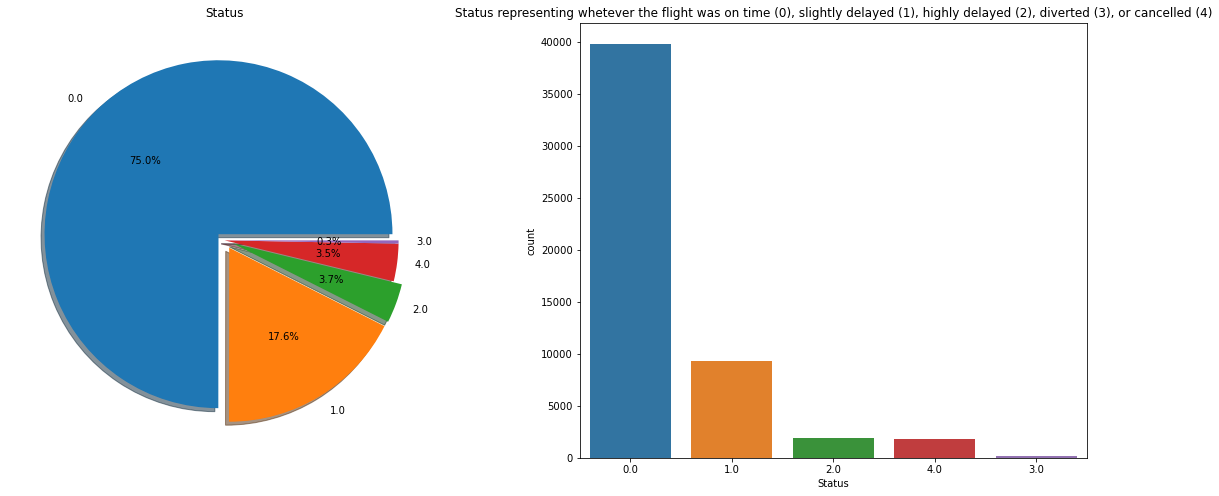

In [66]:
f, ax=plt.subplots(1,2,figsize=(20,8))
merged['Status'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status', order=merged['Status'].value_counts().index, data=merged,ax=ax[1])
ax[1].set_title('Status representing whetever the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')
plt.show()

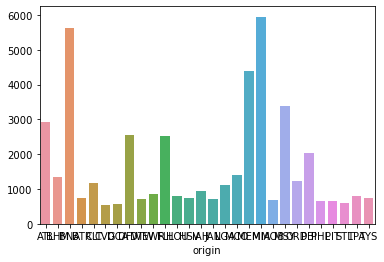

In [74]:
def cancel_func(column):
    org_cancel = merged.groupby(column)['cancelled'].count()
    org_cancel = org_cancel[org_cancel >400]
    sns.barplot(x = org_cancel.index, y = org_cancel.values)

cancel_func('origin')
#cancel_func('dest')

<AxesSubplot:xlabel='airline'>

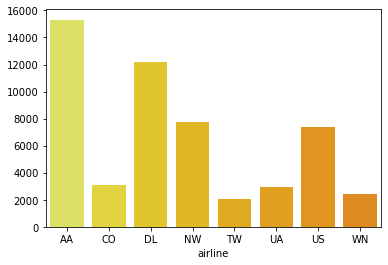

In [75]:
#cancelation by airline
airline_cancel = merged.groupby('airline')['cancelled'].count()
sns.barplot(x = airline_cancel.index, y = airline_cancel.values, palette = 'Wistia')

NameError: name 'delayed_flights' is not defined

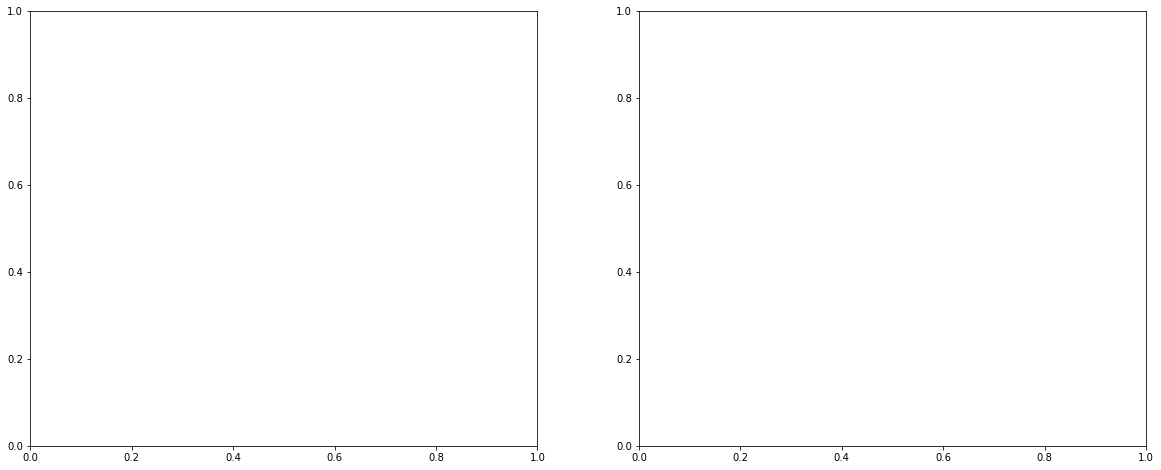

In [76]:
# average arrival delay of airports selected

f,ax=plt.subplots(1,2,figsize=(20,8))
delayed_flights[['flight_date','arr_delay']].groupby(['flight_date']).mean().plot(ax=ax[0])
ax[0].set_title('Average arrival delay during the month')
delayed_flights[['flight_date', 'arr_delay']].groupby(['flight_date']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes of delayed during the month')
plt.show()

NameError: name 'delayed_flights' is not defined

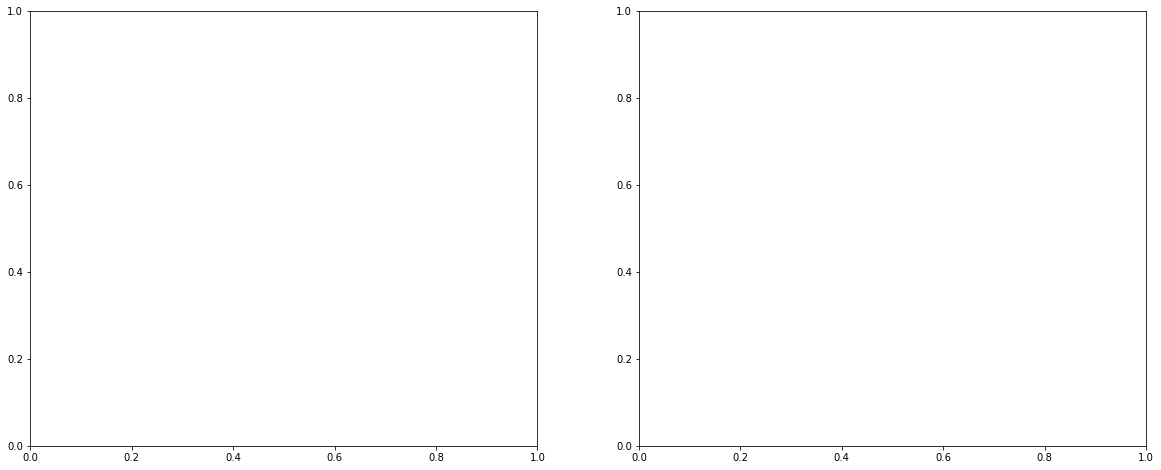

In [77]:
# average departure delay of airports selected

f,ax=plt.subplots(1,2,figsize=(20,8))
delayed_flights[['flight_date','dep_delay']].groupby(['flight_date']).mean().plot(ax=ax[0])
ax[0].set_title('Average arrival delay during the month')
delayed_flights[['flight_date', 'dep_delay']].groupby(['flight_date']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes of delayed during the month')
plt.show()

In [78]:
url = "https://meteostat.p.rapidapi.com/stations/nearby"

querystring ={"lat":}

SyntaxError: invalid syntax (429476611.py, line 3)

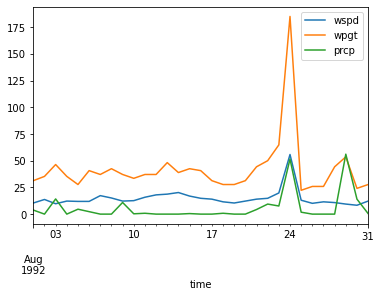

In [82]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Miami

# Set time period
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
miami = Point(25.79319953918457, -80.29060363769531)

# Get daily data for 2018
data = Daily(miami, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

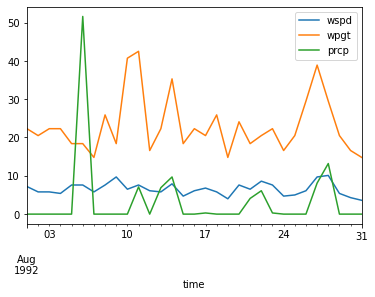

In [83]:
## TYS
# Set time period
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
TYS = Point(35.81100082, -83.9940033)   

# Get daily data for 2018
data = Daily(TYS, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

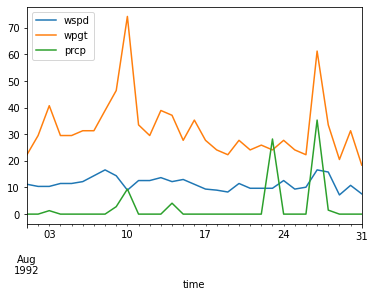

In [84]:
# Nashville BNA
# Set time period
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
BNA = Point(36.1245002746582, -86.6781997680664)   

# Get daily data for 2018
data = Daily(BNA, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

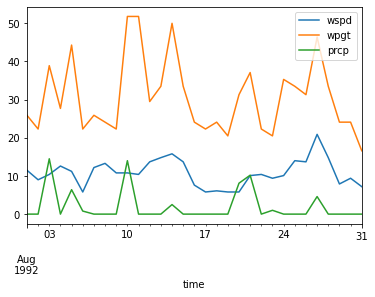

In [86]:
# MEMPHIS MEM
# Set time period
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
MEM = Point(35.04240036010742, -89.97669982910156)   

# Get daily data for 2018
data = Daily(MEM, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

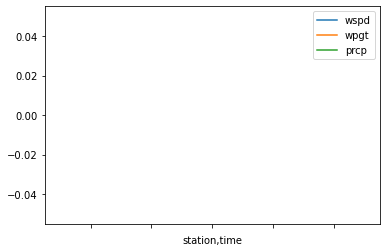

In [85]:
# Fort Lauderdale FFL
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
FFL = Point(26.072599, -80.152702)   

# Get daily data for 2018
data = Daily(FFL, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

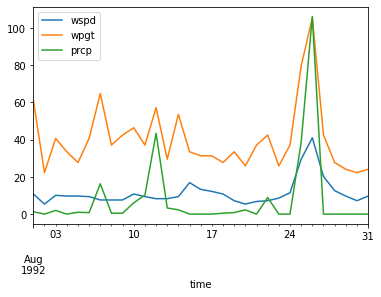

In [87]:
# Louis Armstrong New Orleans International Airport MSY

start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
MSY = Point(29.99340057373047, -90.25800323486328)   

# Get daily data for 2018
data = Daily(MSY, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

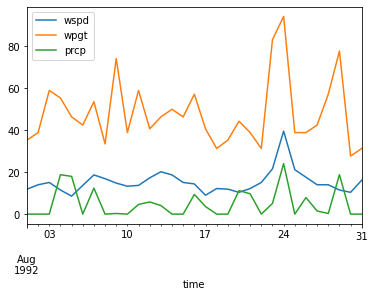

In [88]:
# Palm Beach International Airport PBI
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
PBI = Point(26.68320083618164, -80.09559631347656)

# Get daily data for 2018
data = Daily(PBI, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

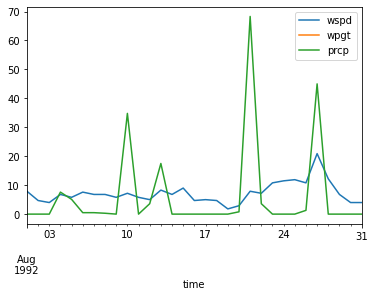

In [89]:
# Birmingham-Shuttlesworth International Airport BHM
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
BHM = Point(33.56290054, -86.75350189)

# Get daily data for 2018
data = Daily(BHM, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()


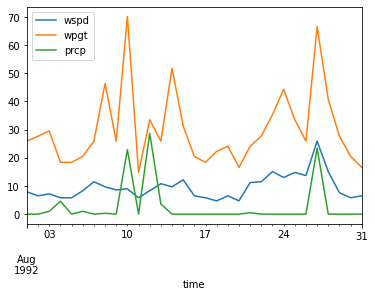

In [90]:
# Huntsville International Carl T Jones Field HSV

start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
HSV = Point(34.637199401855, -86.775100708008)

# Get daily data for 2018
data = Daily(HSV, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

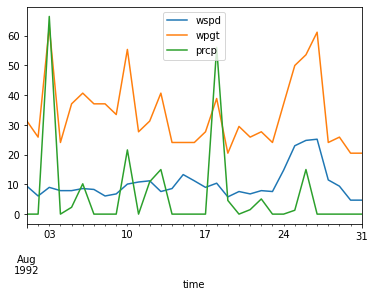

In [91]:
#Mobile Regional Airport MOB 

start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
MOB = Point(30.691200256348, -88.242797851562)

# Get daily data for 2018
data = Daily(MOB, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

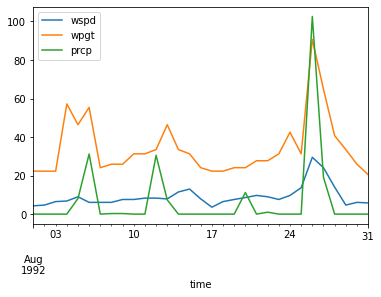

In [92]:
# Jackson-Medgar Wiley Evers International Airport JAN

start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
JAN = Point(32.3111991882, -90.0758972168)

# Get daily data for 2018
data = Daily(JAN, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

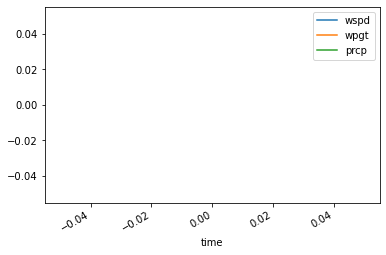

In [93]:
# Shreveport Regional Airport SHV

start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
SHV = Point(32.446602, -93.8256)

# Get daily data for 2018
data = Daily(SHV, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

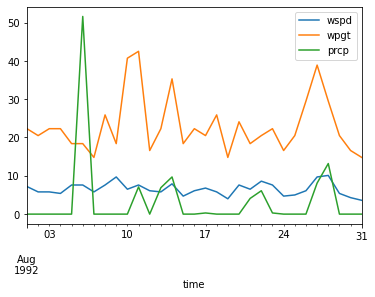

In [94]:

start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
SHV = Point(35.81100082,-83.9940033)

# Get daily data for 2018
data = Daily(SHV, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

In [ ]:
import sql
from sql import get_data




visu = get_data("SELECT faa AS IATA, name, lat, lon, city, country FROM muc_analytics_21_1.airports WHERE faa IN ('BNA', 'MIA', 'MEM', 'MSY', 'DFW')")
visu['passengers'] = [10000, 10000, 10000, 10000, 10000] 
visu


In [ ]:
visu

In [ ]:
import numpy as np
import pandas as pd

from lets_plot import*

LetsPlot.setup_html()

In [ ]:
LetsPlot.set(maptiles_zxy(
    url='https://gibs.earthdata.nasa.gov/wmts/epsg3857/best/VIIRS_CityLights_2012/default//GoogleMapsCompatible_Level8/{z}/{y}/{x}.jpg',
    attribution='<a href="https://earthdata.nasa.gov/eosdis/science-system-description/eosdis-components/gibs">© NASA Global Imagery Browse Services (GIBS)</a>',
    max_zoom=8
))

In [ ]:
from lets_plot.geo_data import *

countries_gcoder = geocode_countries(['USA'])
countries_gcoder.get_geocodes()

In [ ]:
(ggplot() 
 + geom_livemap(location=[-99.74, 37.25],
                zoom=4)
 + geom_polygon(aes(fill='country'), 
                data=countries_gcoder.get_boundaries(), 
                alpha=.2)
 + geom_point(aes('lon', 'lat', fill='country', size="passengers"),
              data=visu,
              shape=28,
              alpha=.9,
              color='red',
              tooltips=layer_tooltips()
                        .format('passengers', '{.1f} m' )
                        .format('^x', '.2f').format('^y', '.2f')
                        .line('@|@iata')
                        .line('Passengers|@passengers') 
                        .line('City|@city') 
                        .line('Country|@country') 
                        .line('lon|^x')
                        .line('lat|^y'))
 + scale_fill_manual(values=['#30a2da', '#fc4f30'])
 + scale_size(range=[10, 40], trans='sqrt')
 + theme(legend_position='none')
 + ggsize(900, 520)
) 

In [ ]:
import sql
from sql import get_data

visu = get_data("SELECT faa, name, lat, lon, city FROM muc_analytics_21_1.airports WHERE faa IN ('BNA', 'MIA', 'MEM', 'MSY', 'DFW')")
visu.head